In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.5.0 pandas==1.0.5 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.3 leidenalg==0.8.2


In [4]:
results_file = 'D:/scRNA-seq_demo_data/test.h5ad'  # the file that will store the analysis results

#### Read in2 the count matrix into an `AnnData <https://anndata.readthedocs.io/en/latest/anndata.AnnData.html>`__ object, which holds many slots for annotations and different representations of the data. It also comes with its own HDF5 file format: .h5ad.

In [5]:
adata1 = sc.read_10x_mtx(
    'D:/scRNA-seq_demo_data/sample_1/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                          # write a cache file for faster subsequent reading
adata1.obs['batch']='1'

... reading from cache file cache\D-scRNA-seq_demo_data-sample_1-matrix.h5ad


In [6]:
adata2 = sc.read_10x_mtx(
    'D:/scRNA-seq_demo_data/sample_2/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                          # write a cache file for faster subsequent reading
adata2.obs['batch']='2'

... reading from cache file cache\D-scRNA-seq_demo_data-sample_2-matrix.h5ad


In [7]:
adata3 = sc.read_10x_mtx(
    'D:/scRNA-seq_demo_data/sample_3/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                          # write a cache file for faster subsequent reading
adata3.obs['batch']='3'

... reading from cache file cache\D-scRNA-seq_demo_data-sample_3-matrix.h5ad


In [8]:
adata4 = sc.read_10x_mtx(
    'D:/scRNA-seq_demo_data/sample_4/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                          # write a cache file for faster subsequent reading
adata4.obs['batch']='4'

... reading from cache file cache\D-scRNA-seq_demo_data-sample_4-matrix.h5ad


In [9]:
adata5 = sc.read_10x_mtx(
    'D:/scRNA-seq_demo_data/sample_5/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                          # write a cache file for faster subsequent reading
adata5.obs['batch']='5'

... reading from cache file cache\D-scRNA-seq_demo_data-sample_5-matrix.h5ad


In [10]:
adata6 = sc.read_10x_mtx(
    'D:/scRNA-seq_demo_data/sample_6/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                          # write a cache file for faster subsequent reading
adata6.obs['batch']='6'

... reading from cache file cache\D-scRNA-seq_demo_data-sample_6-matrix.h5ad


In [11]:
adata7 = sc.read_10x_mtx(
    'D:/scRNA-seq_demo_data/sample_7/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                          # write a cache file for faster subsequent reading
adata7.obs['batch']='7'

... reading from cache file cache\D-scRNA-seq_demo_data-sample_7-matrix.h5ad


In [12]:
adata8 = sc.read_10x_mtx(
    'D:/scRNA-seq_demo_data/sample_8/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                          # write a cache file for faster subsequent reading
adata8.obs['batch']='8'

... reading from cache file cache\D-scRNA-seq_demo_data-sample_8-matrix.h5ad


In [13]:
adata1.obs['batch']

AAACCCAAGCGTATGG-1    1
AAACCCACAGCGTACC-1    1
AAACCCAGTCCGGATC-1    1
AAACCCAGTGTCTAAC-1    1
AAACCCATCAAAGAAC-1    1
                     ..
TTTGTTGAGGAAAGTG-1    1
TTTGTTGCACCAATTG-1    1
TTTGTTGCATTCACCC-1    1
TTTGTTGCATTCTCTA-1    1
TTTGTTGTCTCGGTCT-1    1
Name: batch, Length: 3338, dtype: object

In [14]:
adata2.obs['batch']

AAACGAACAACCGATT-1    2
AAACGAACAGAGATGC-1    2
AAACGCTCACAATGAA-1    2
AAACGCTTCGCTGACG-1    2
AAAGAACAGACTGTTC-1    2
                     ..
TTTCATGTCTCCCAAC-1    2
TTTCCTCGTATTTCCT-1    2
TTTCGATTCGAGTGAG-1    2
TTTGGAGGTGAATGTA-1    2
TTTGGTTAGACATGCG-1    2
Name: batch, Length: 1360, dtype: object

In [15]:
adata =adata1.concatenate(adata2, adata3, adata4, adata5, adata6, adata7, adata8)

In [ ]:
'''#Harmony works by adjusting the principal components, this function should be run after performing PCA but before computing the neighbor graph,'''
sc.tl.pca(adata) 


computing PCA
    with n_comps=50


In [ ]:
sce.pp.harmony_integrate(adata, 'batch')

In [144]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [145]:
adata

AnnData object with n_obs × n_vars = 23683 × 32525
    obs: 'batch'
    var: 'gene_ids'

normalizing counts per cell
    finished (0:00:00)


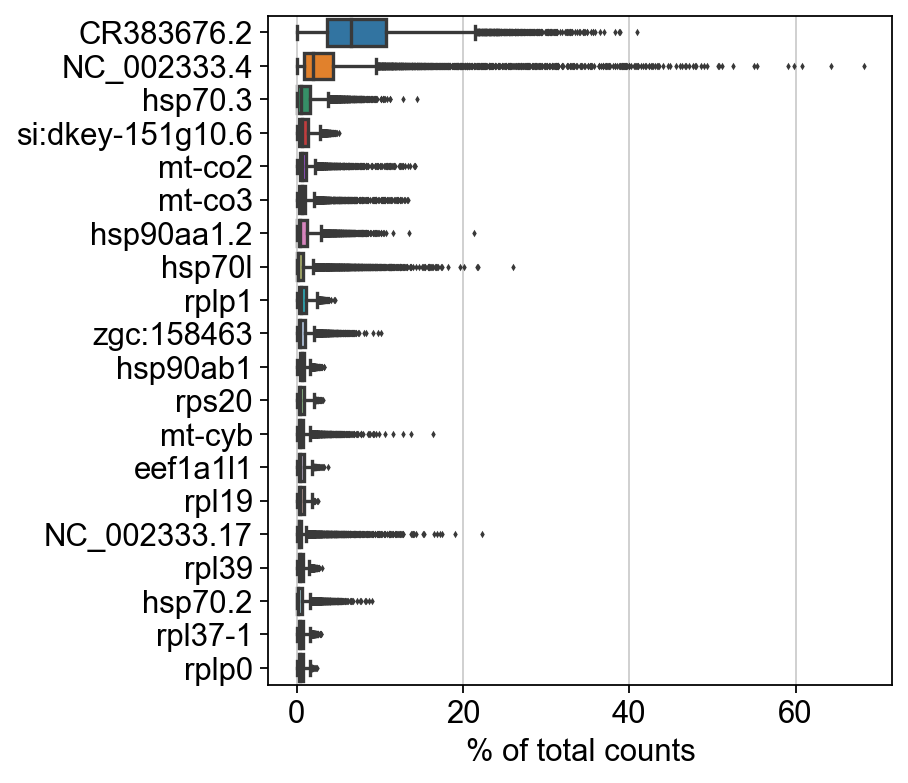

In [147]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [148]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 15 cells that have less than 200 genes expressed
filtered out 8636 genes that are detected in less than 3 cells


In [149]:
adata.var['mt'] = adata.var_names.str.startswith('mt')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

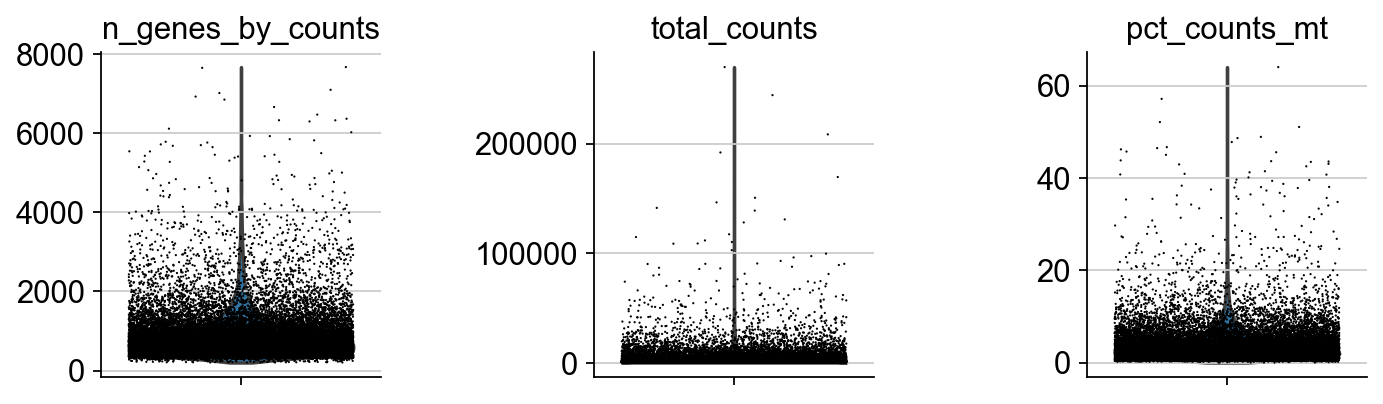

In [150]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

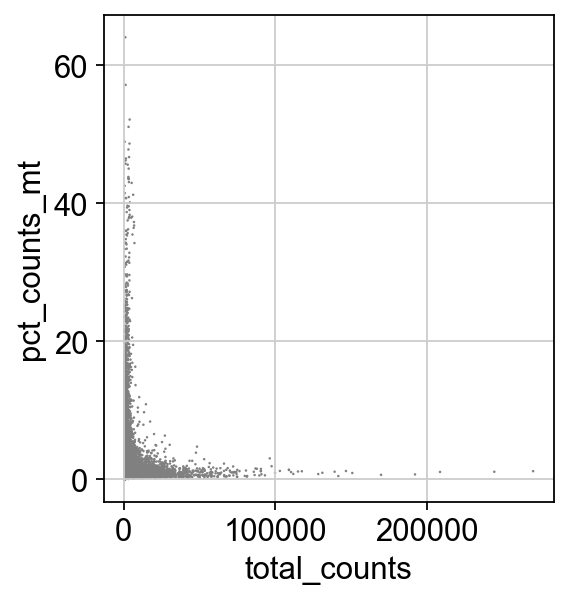

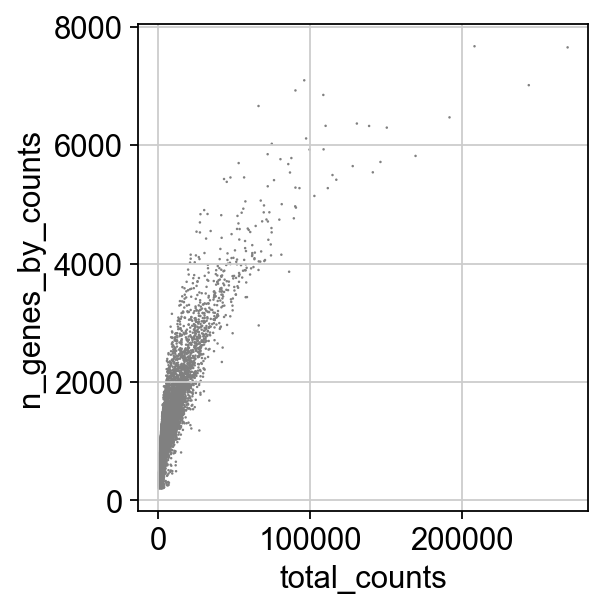

In [151]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [63]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [64]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


C:\Users\fernandes\AppData\Local\Continuum\anaconda2\envs\Seq_env\lib\site-packages\scanpy\preprocessing\_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [65]:
sc.pp.log1p(adata)

In [66]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


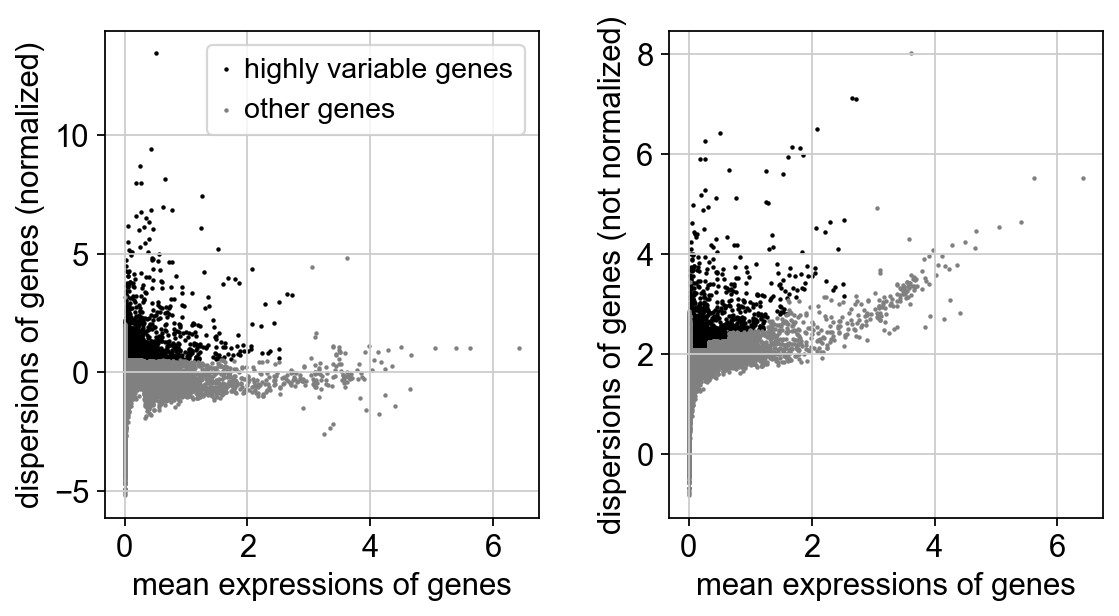

In [67]:
sc.pl.highly_variable_genes(adata)

In [68]:
adata.raw = adata

In [69]:
adata = adata[:, adata.var.highly_variable]

In [91]:
adata

AnnData object with n_obs × n_vars = 2546 × 4053
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [70]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:18)


In [71]:
sc.pp.scale(adata, max_value=10)

In [72]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


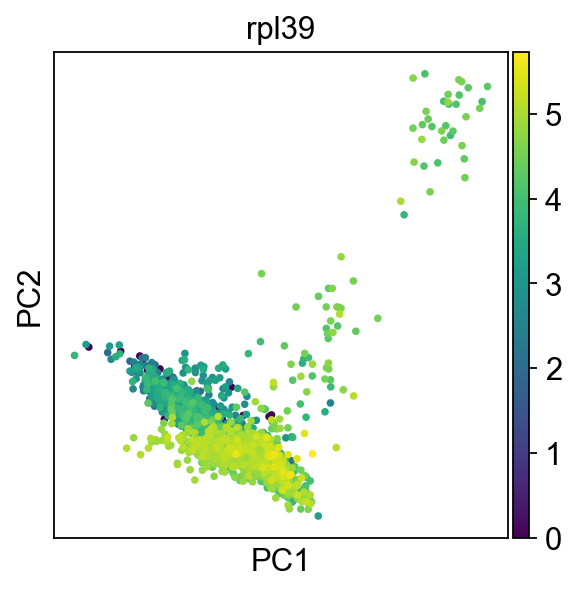

In [73]:
sc.pl.pca(adata, color='rpl39')

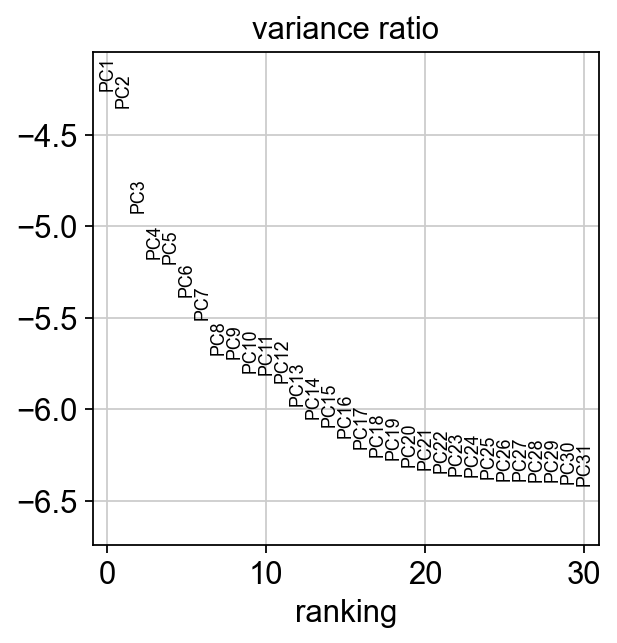

In [74]:
sc.pl.pca_variance_ratio(adata, log=True)

In [75]:
adata.write(results_file)

In [76]:
adata

AnnData object with n_obs × n_vars = 2546 × 4053
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [77]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [78]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


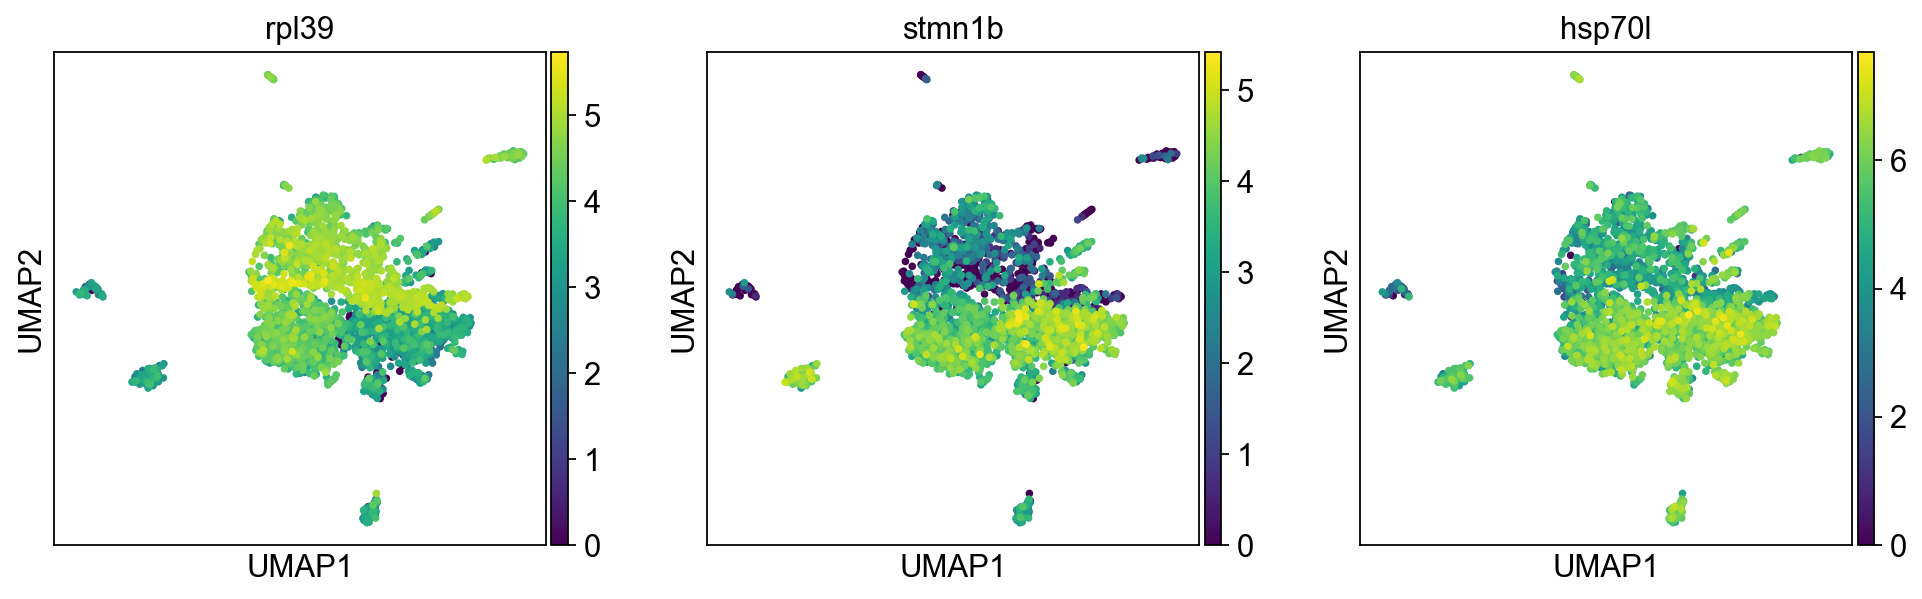

In [79]:
sc.pl.umap(adata, color=['rpl39', 'stmn1b', 'hsp70l'])

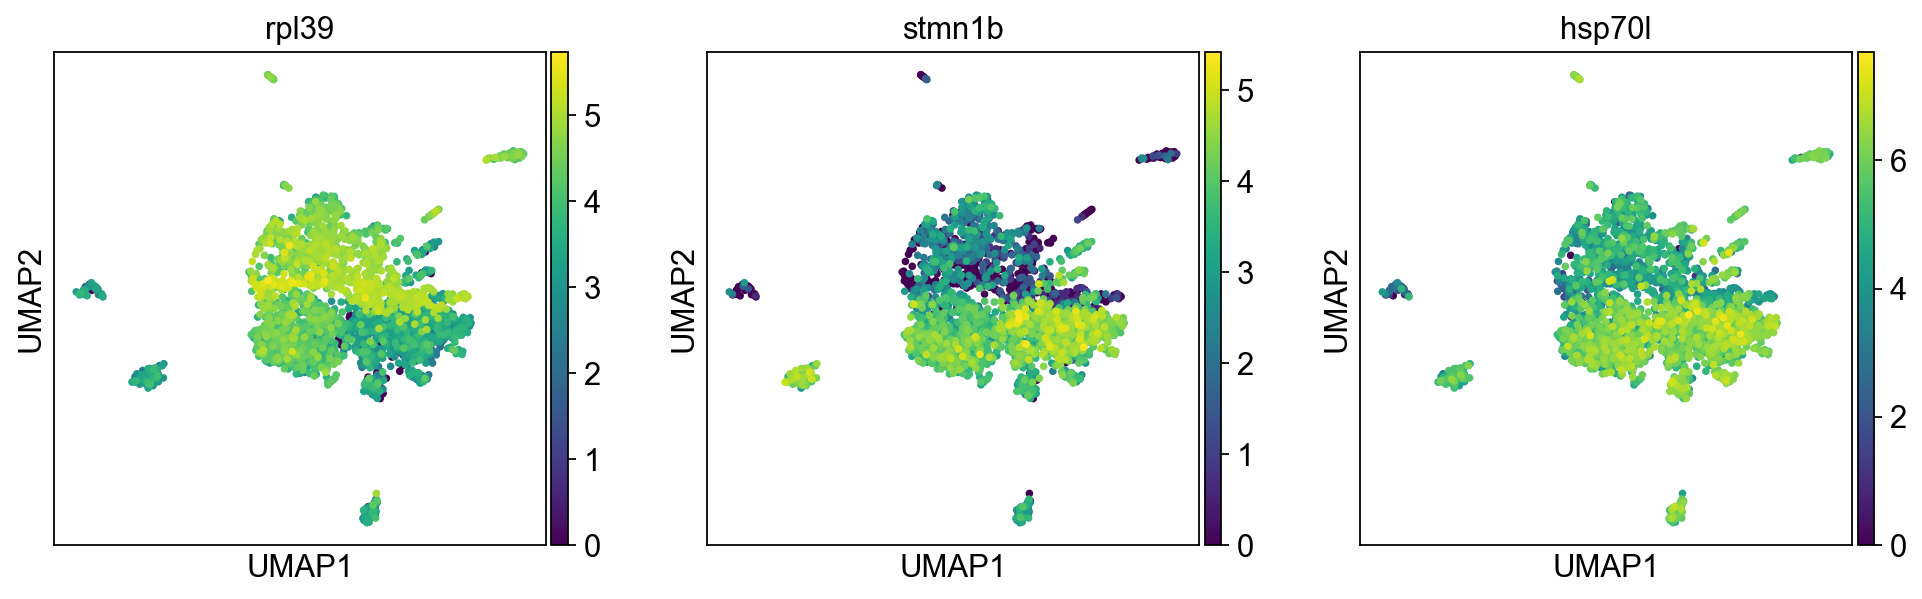

In [80]:
sc.pl.umap(adata, color=['rpl39', 'stmn1b', 'hsp70l'], use_raw=True)

In [81]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


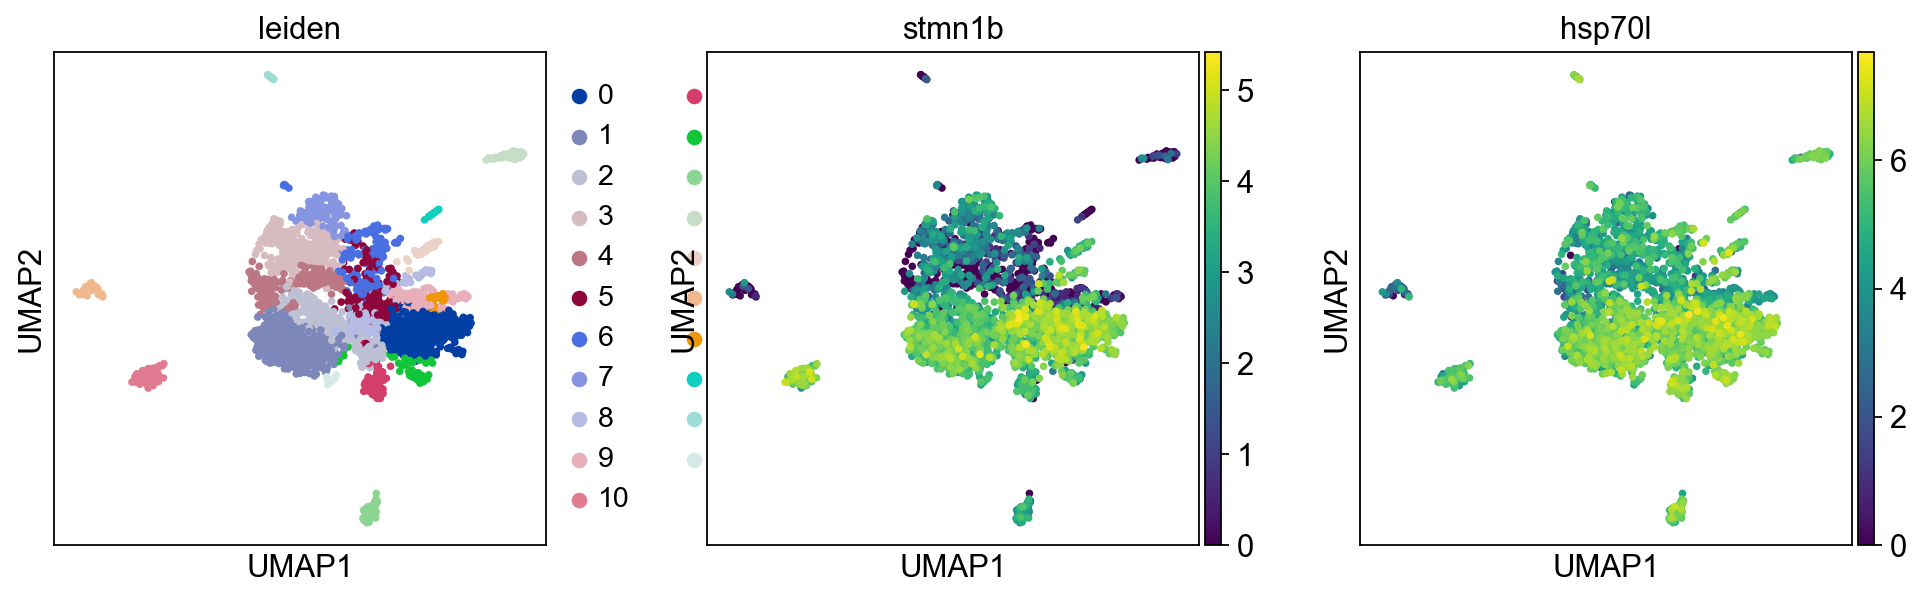

In [82]:
sc.pl.umap(adata, color=['leiden', 'stmn1b', 'hsp70l'])

In [83]:
adata.write(results_file)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


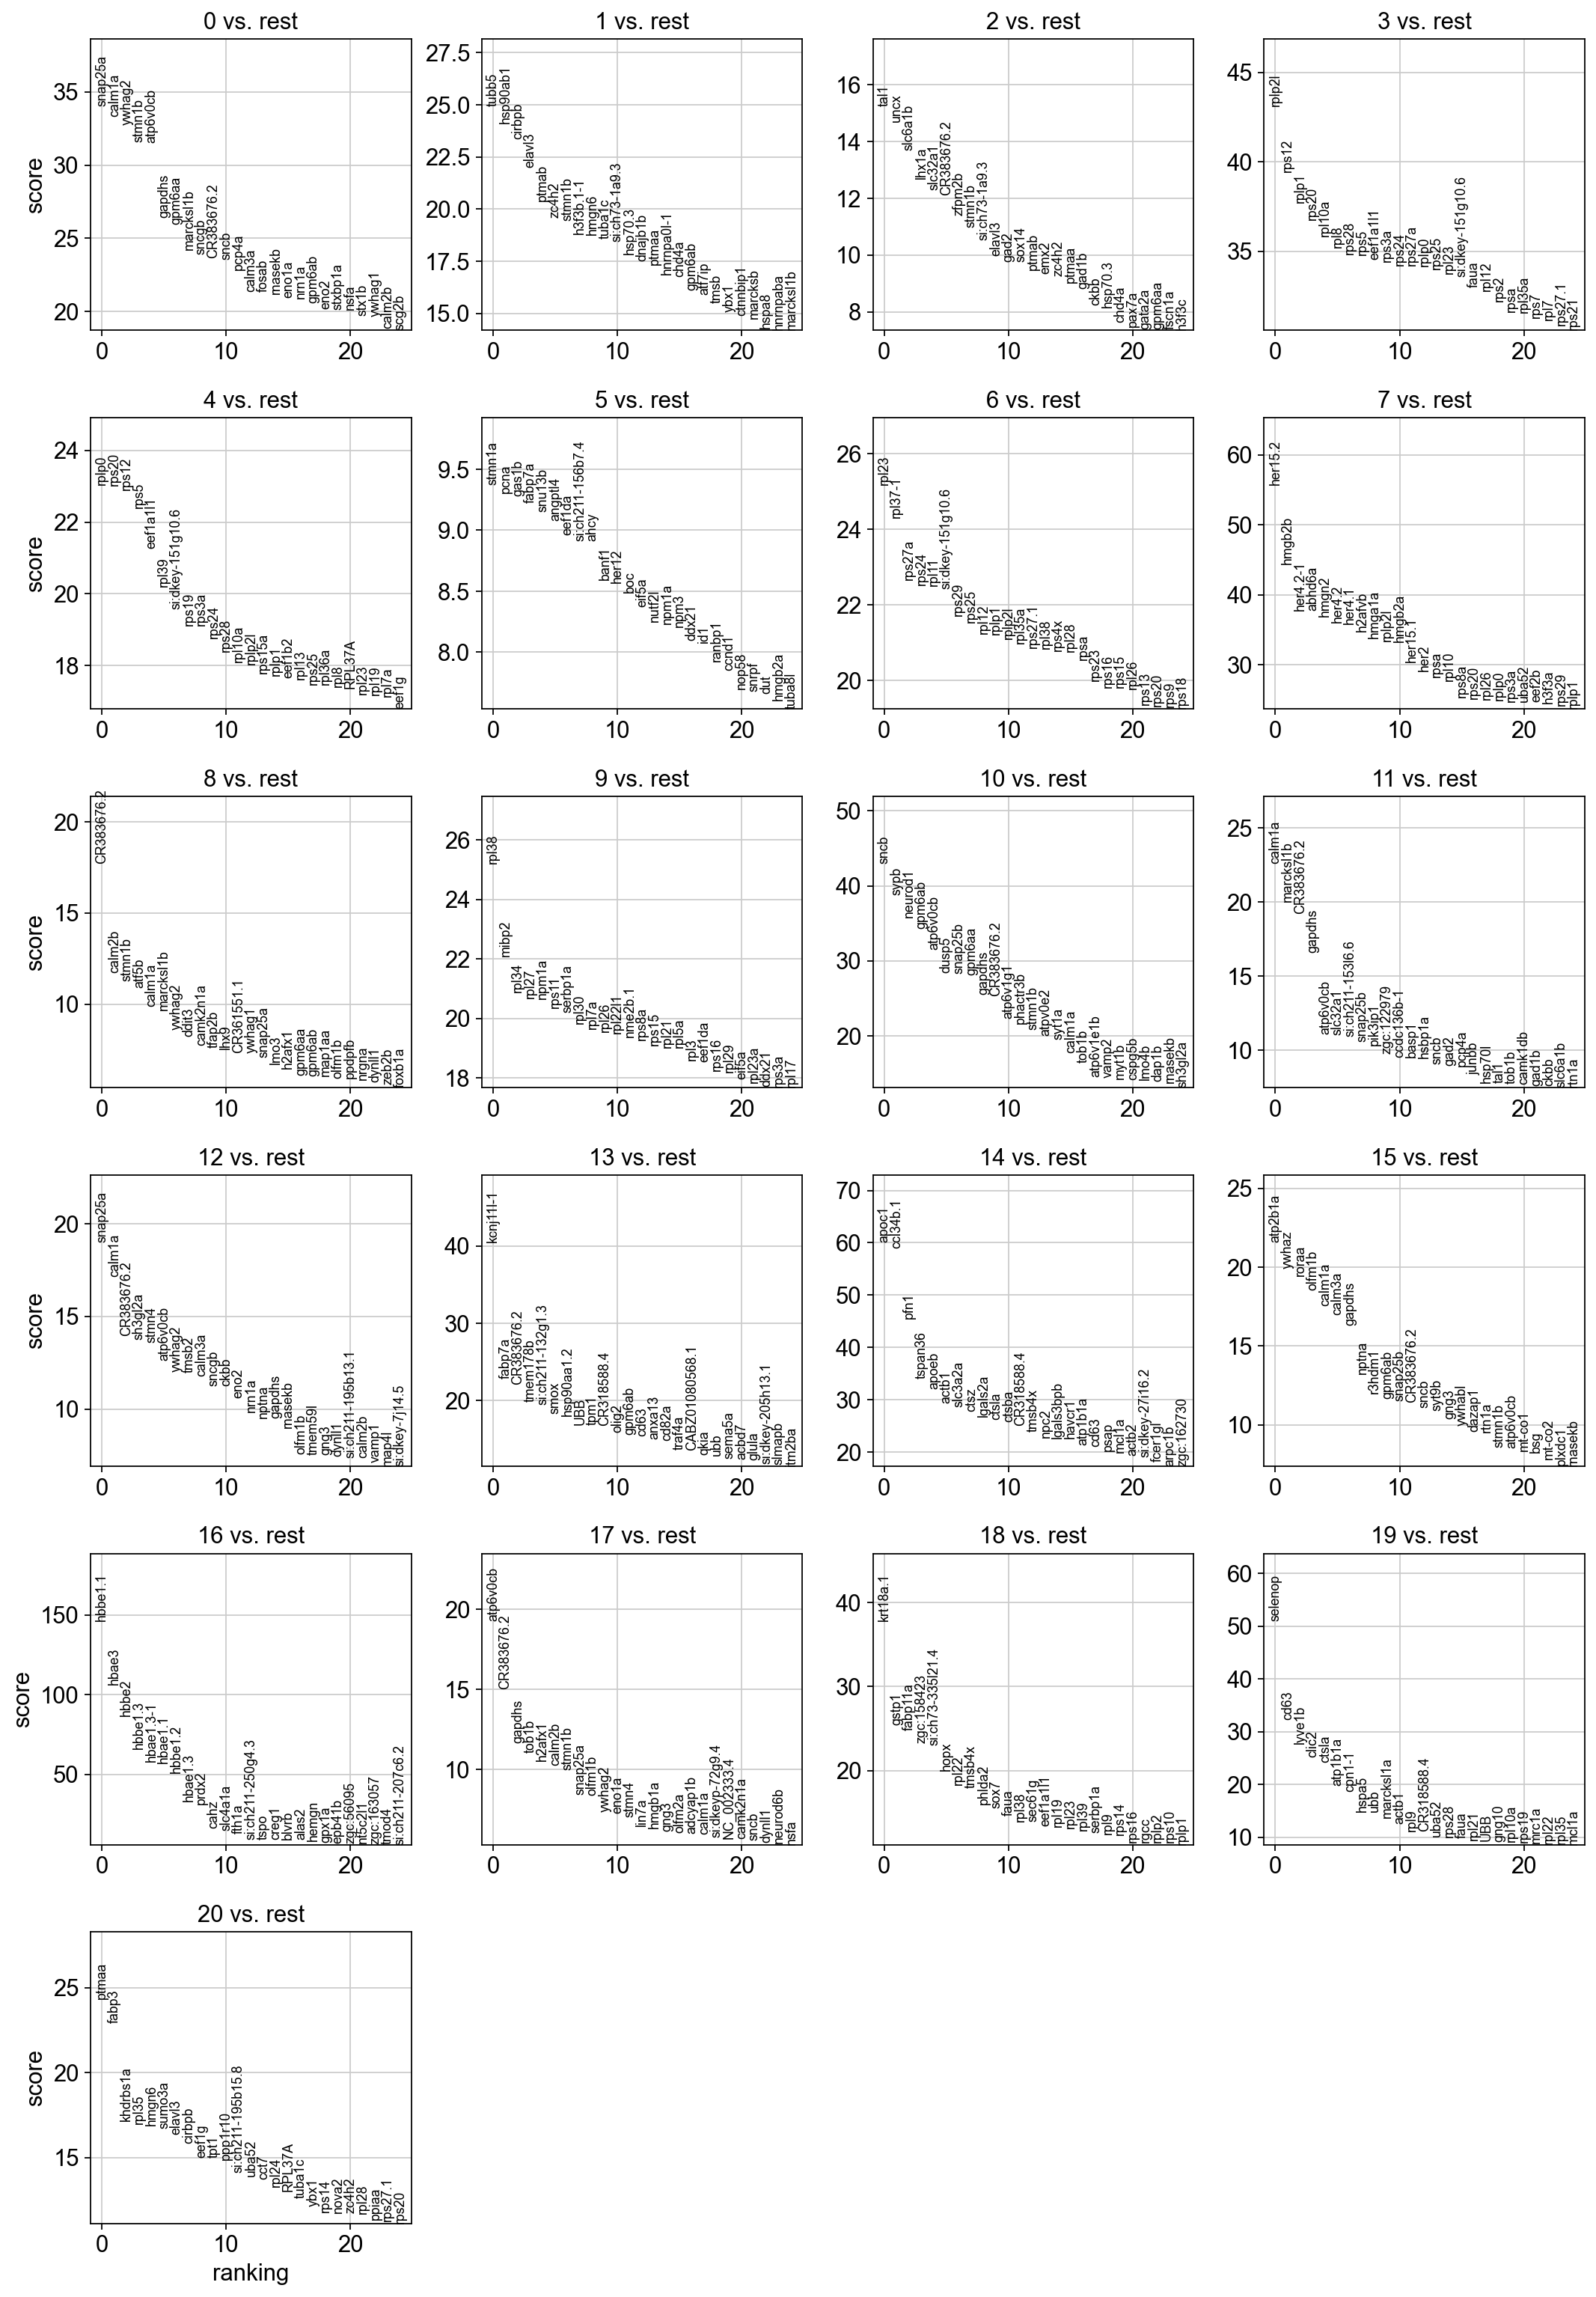

In [84]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [85]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:00:05)


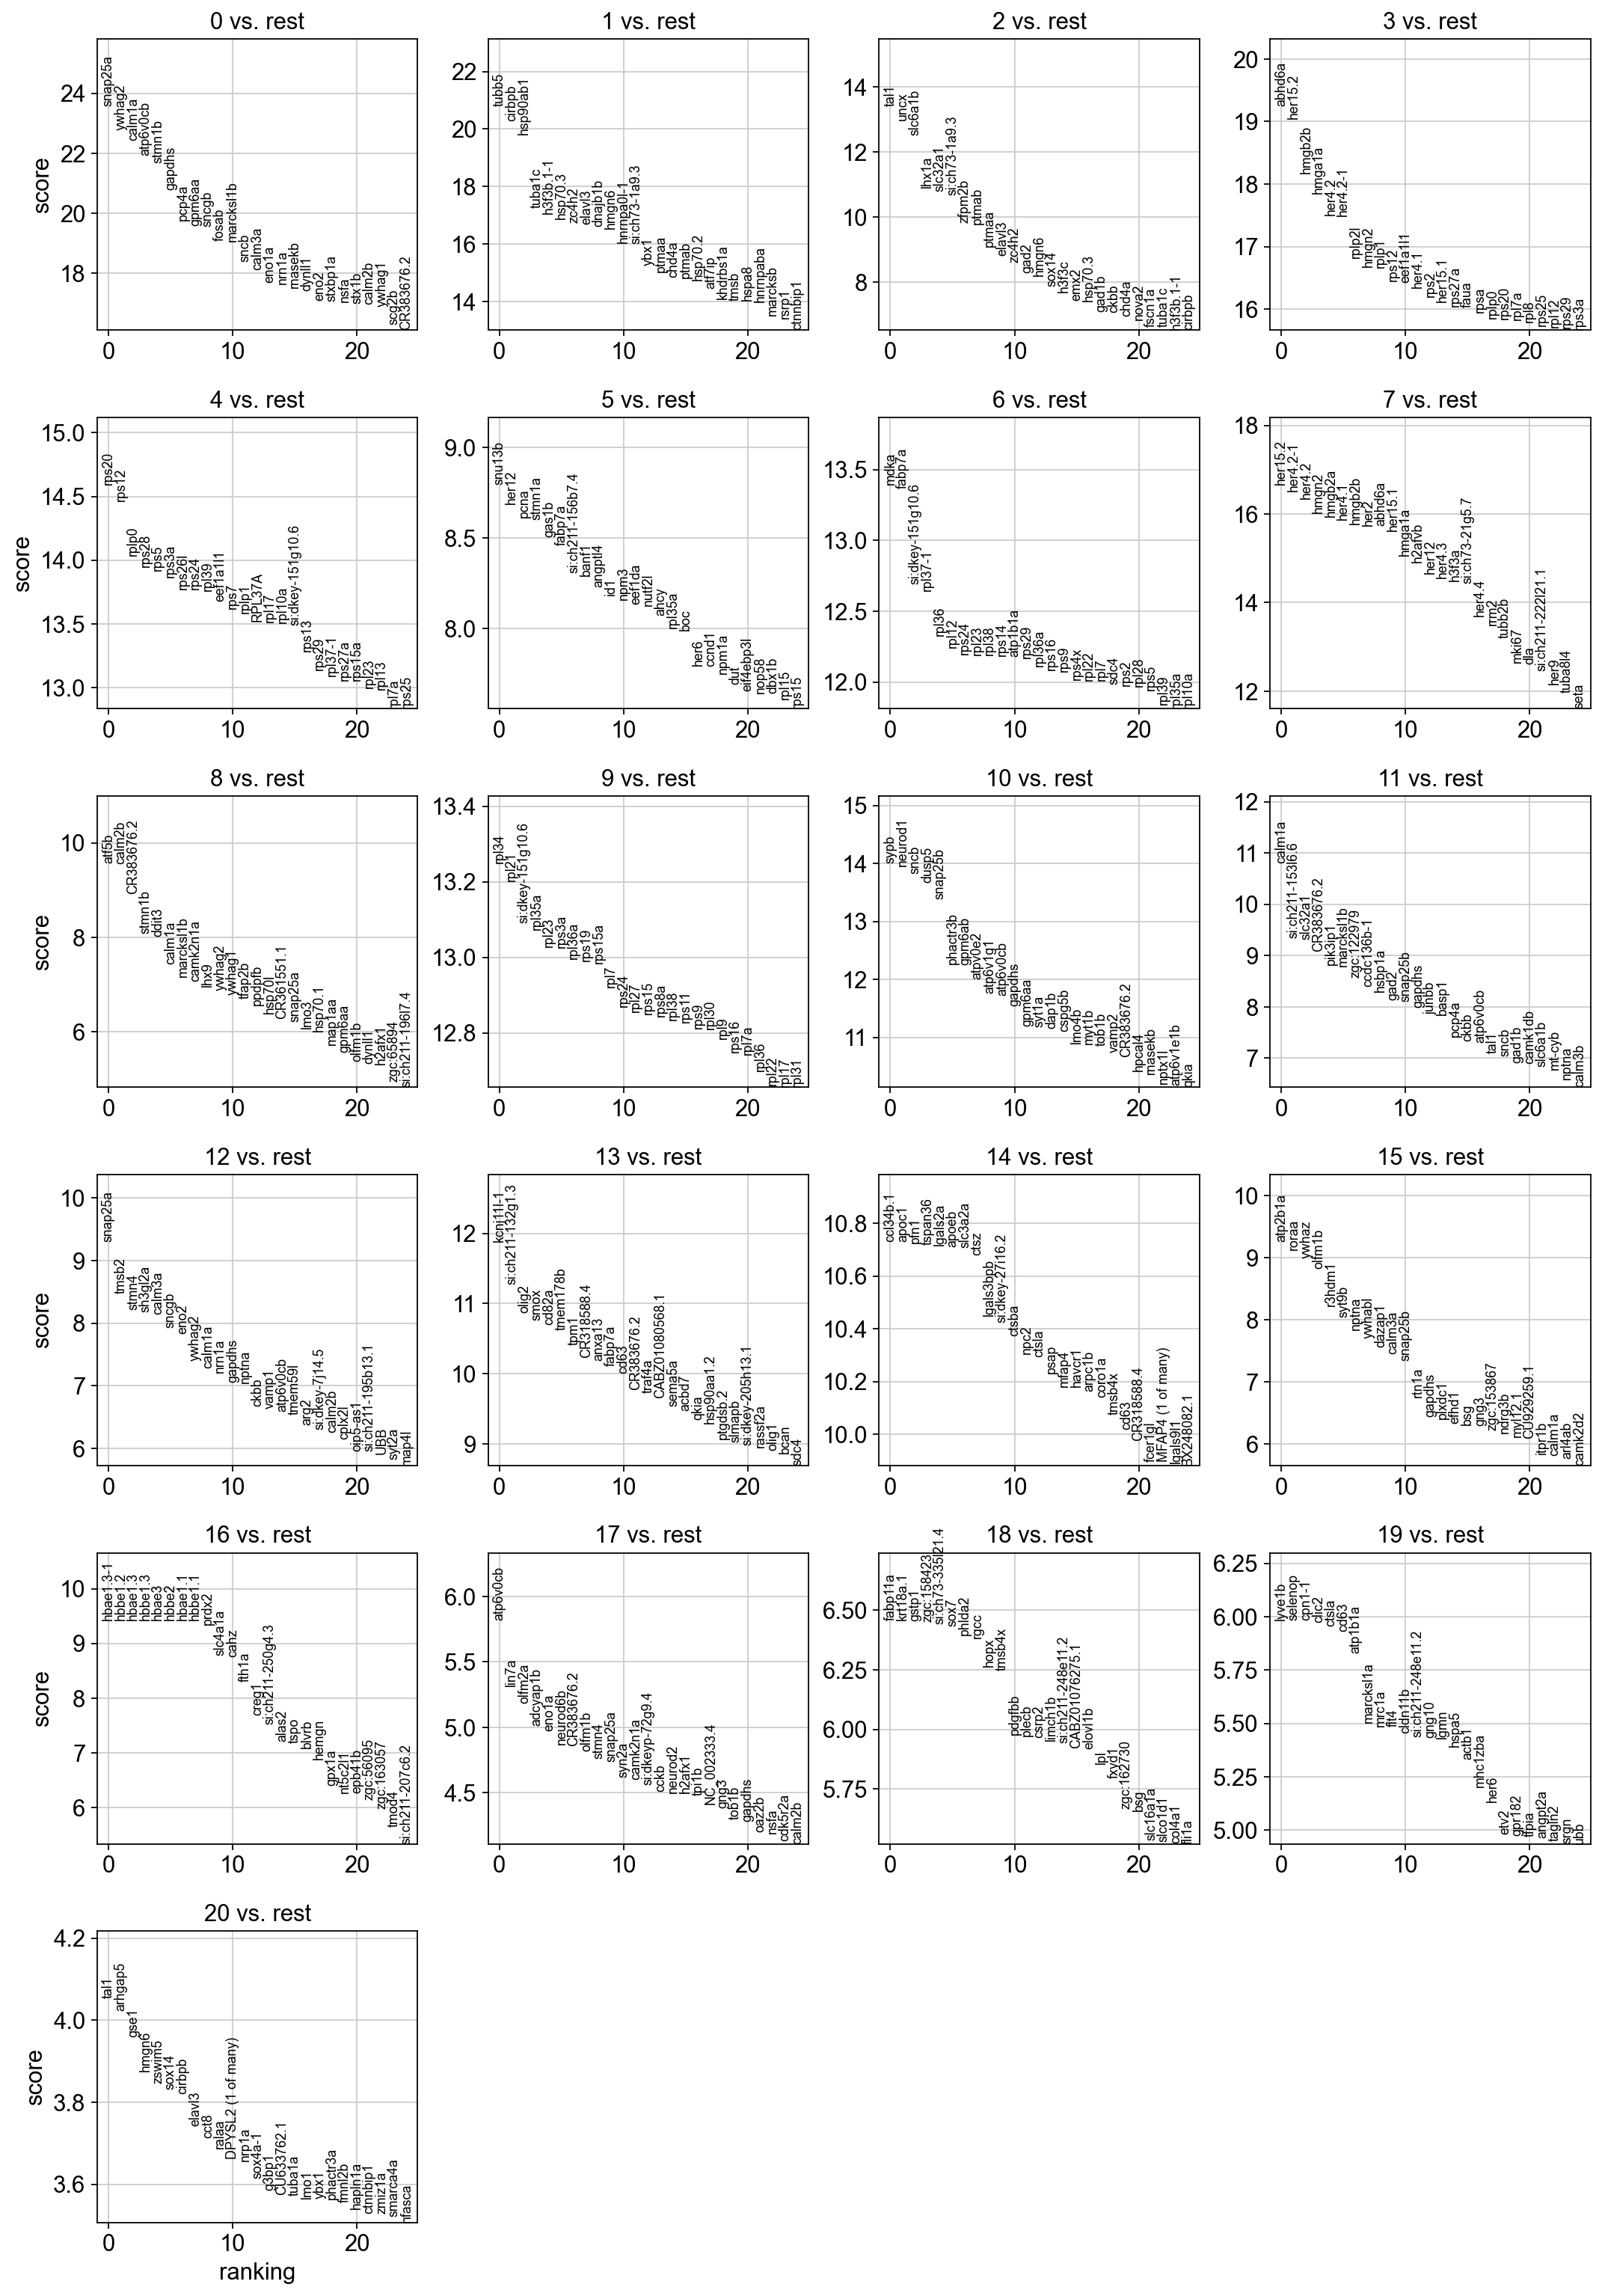

In [86]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [87]:
adata.write(results_file)

ranking genes


C:\Users\fernandes\AppData\Local\Continuum\anaconda2\envs\Seq_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    finished (0:00:20)


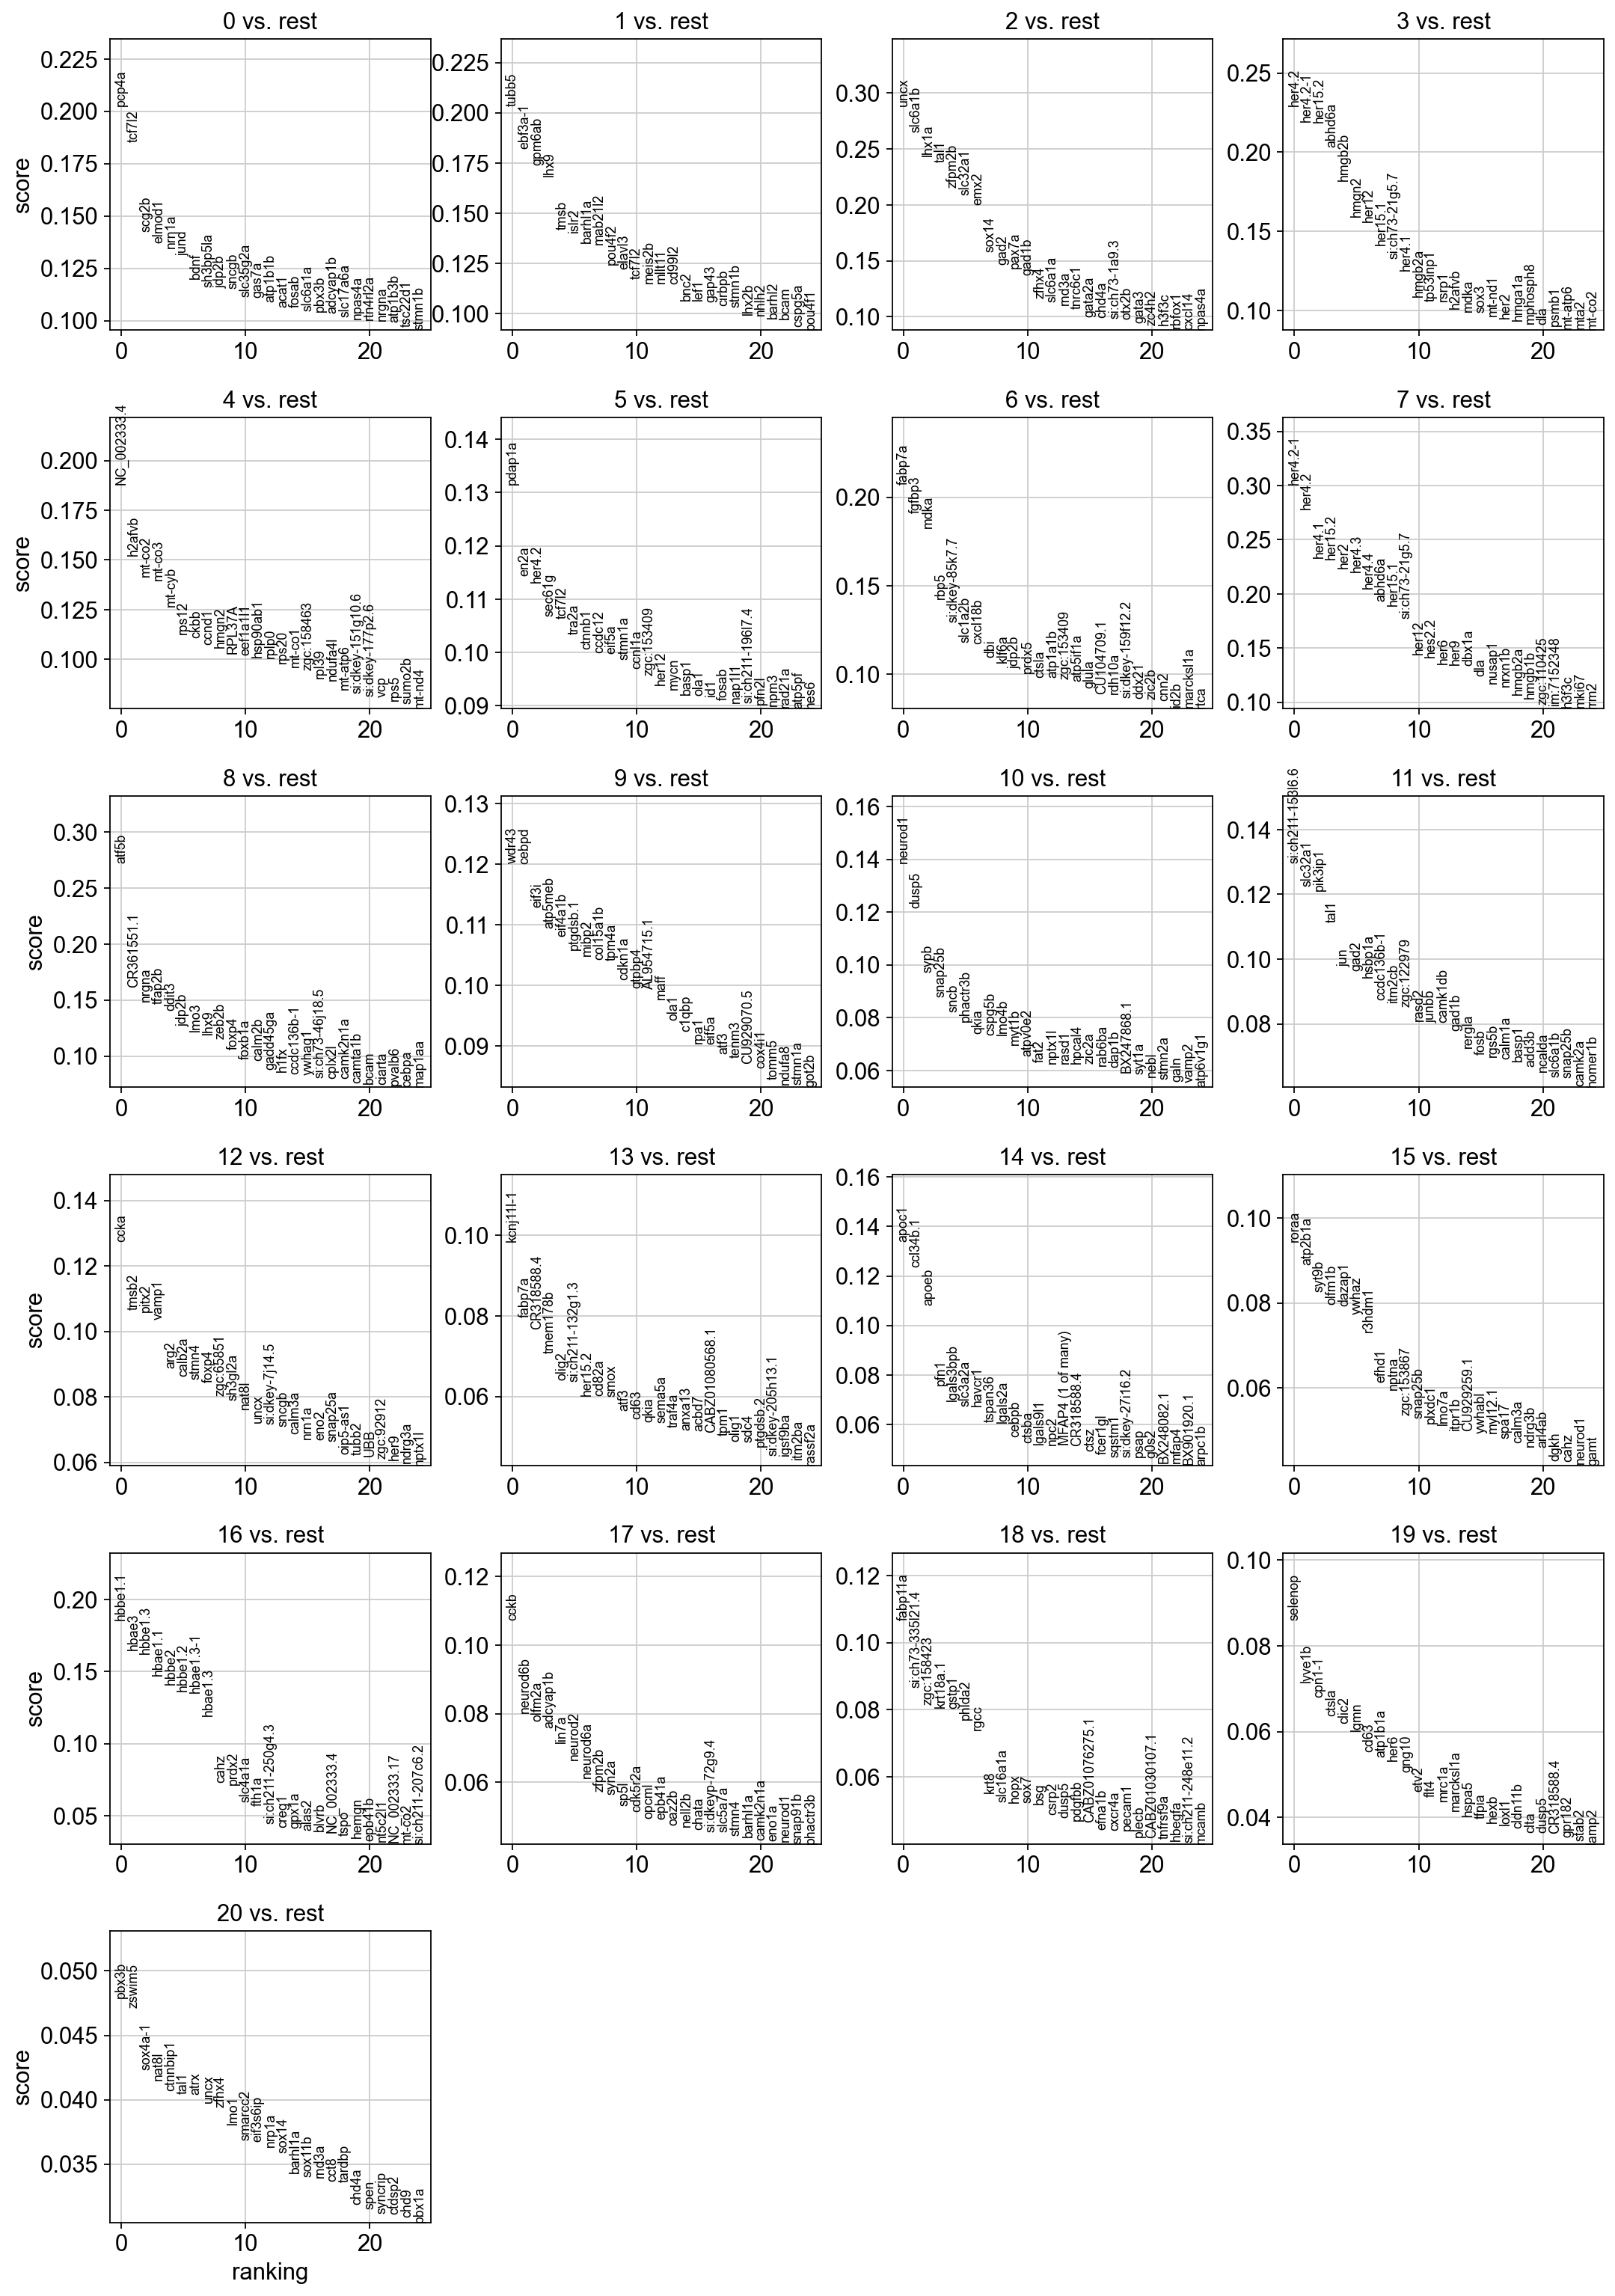

In [88]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)